# Agrupamento - Heart Disease - Feito!

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os

np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
X_train = df.drop(['target'], axis=1)
Y_train = df['target']

In [4]:
Y_train.sum()

165

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X_train = scaler.fit_transform(X_train)

In [7]:
centroides = [np.random.rand(2,13) for i in range(10)]

### Aplicação do K-means

In [8]:
from sklearn.cluster import KMeans

melhor_acuracia = 0

for cent_init in centroides:

    kmeans = KMeans(n_clusters = 2, init = cent_init, random_state = 42)
    kmeans.fit(X_train)

    Y_pred = kmeans.labels_

    confusion_matrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confusion_matrix[i,j] = sum((kmeans.labels_ == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])

    c = df_cm.copy()
    mapping = {}

    for a in range(2):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)

    Y_pred = np.array([mapping[x] for x in kmeans.labels_])

    confusion_matrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])

    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix

    print('Acurácia:', acuracia)

Acurácia: 0.7194719471947195
Acurácia: 0.6138613861386139
Acurácia: 0.7194719471947195
Acurácia: 0.6138613861386139
Acurácia: 0.7194719471947195
Acurácia: 0.45874587458745875
Acurácia: 0.7194719471947195
Acurácia: 0.7194719471947195
Acurácia: 0.7194719471947195
Acurácia: 0.7194719471947195


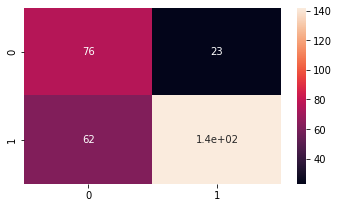

In [9]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])

plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

### Aplicação do K-means adaptativo

In [10]:
from hard import kmeans_constraints_exato
melhor_acuracia = 0

for cent_init in centroides:

    n_samples = len(X_train)
    clusters = 2
    Z = np.ones((n_samples,))
    mu = np.array([165,138])

    LABELS = kmeans_constraints_exato(X_train,Z,clusters,cent_init,mu)
    labels = LABELS[-1]

    confusion_matrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confusion_matrix[i,j] = sum((labels == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])

    c = df_cm.copy()
    mapping = {}

    for a in range(2):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)
    
    Y_pred = np.array([mapping[x] for x in labels])
    
    confusion_matrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])
    
    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix

    print('Acurácia:', acuracia)

Acurácia: 0.7194719471947195
Acurácia: 0.693069306930693
Acurácia: 0.504950495049505
Acurácia: 0.5676567656765676
Acurácia: 0.7722772277227723
Acurácia: 0.5676567656765676
Acurácia: 0.7821782178217822
Acurácia: 0.7755775577557755
Acurácia: 0.7755775577557755
Acurácia: 0.7722772277227723


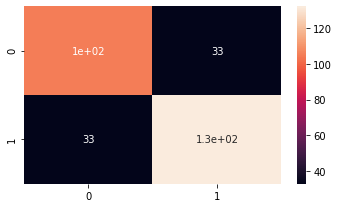

In [11]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])

plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

### Aplicação do K-means adaptativo com função de priorização

In [13]:
from hard import pert_quad, kmeans_capacity_constraints

melhor_acuracia = 0
mu = np.array([165,138])

for cent_init in centroides:

    n_samples = len(X_train)
    clusters = 2
    Z = np.ones((n_samples,))
    mu = np.array([165,138])

    LABELS, _ = kmeans_capacity_constraints(X_train,Z,clusters,pert_quad,cent_init,mu)
    labels = LABELS[-1]

    confusion_matrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confusion_matrix[i,j] = sum((labels == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])

    c = df_cm.copy()
    mapping = {}

    for a in range(2):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)
    
    Y_pred = np.array([mapping[x] for x in labels])
    
    confusion_matrix = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])
    
    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix

    print('Acurácia:', acuracia)

Acurácia: 0.7557755775577558
Acurácia: 0.7887788778877888
Acurácia: 0.5610561056105611
Acurácia: 0.47854785478547857
Acurácia: 0.6567656765676567
Acurácia: 0.6501650165016502
Acurácia: 0.7623762376237624
Acurácia: 0.6831683168316832
Acurácia: 0.7095709570957096
Acurácia: 0.7227722772277227


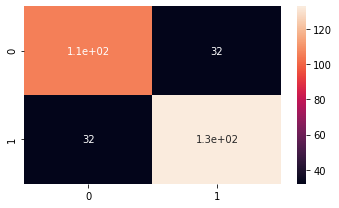

In [14]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "01"],
                      columns = [i for i in "01"])

plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

In [8]:
boxplot = pd.DataFrame()

boxplot['K-means'] = [0.7194, 0.6138, 0.7194, 0.6138, 0.7194, 0.4587, 0.7194, 0.7194, 0.7194, 0.7194]
boxplot['Algoritmo 2'] = [0.7194, 0.6930, 0.5049, 0.5676, 0.7722, 0.5676, 0.7821, 0.7755, 0.7755, 0.7722]
boxplot['Algoritmo 3'] = [0.7557, 0.7887, 0.5610, 0.4785, 0.6567, 0.6501, 0.7623, 0.6831, 0.7095, 0.7227]

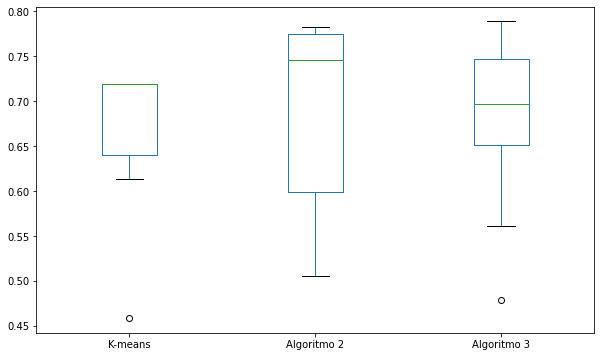

In [9]:
import pandas as pd
fig = plt.figure(figsize=(10,6))
boxplot.boxplot()

plt.grid(None)
#fig.savefig('figures/'+path+'_boxplot.png')
plt.show()